In [1]:
  !pip install tensorflow_datasets

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import ipywidgets as ipy
ipy.IntSlider()


IntSlider(value=0)

In [4]:
import tensorflow as tf
import zipfile
import os
import pathlib
from tensorflow.keras.preprocessing import image_dataset_from_directory # type: ignore

# Step 1: Download ZIP (no extract)
url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_path = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=url, extract=False) # type: ignore

# Step 2: Extract manually
extract_dir = os.path.join(os.path.dirname(zip_path), 'cats_and_dogs_filtered')
if not os.path.exists(extract_dir):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(os.path.dirname(zip_path))

# Step 3: Define dataset paths
train_dir = os.path.join(extract_dir, 'train')
val_dir = os.path.join(extract_dir, 'validation')

# Step 4: Load the datasets
train_ds = image_dataset_from_directory(train_dir, image_size=(180, 180), batch_size=32)
val_ds = image_dataset_from_directory(val_dir, image_size=(180, 180), batch_size=32)



Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [5]:
print(train_ds.class_names)
total_images = 0
for batch in train_ds:
    total_images += batch[0].shape[0]
print("Total training images:", total_images)


['cats', 'dogs']
Total training images: 2000


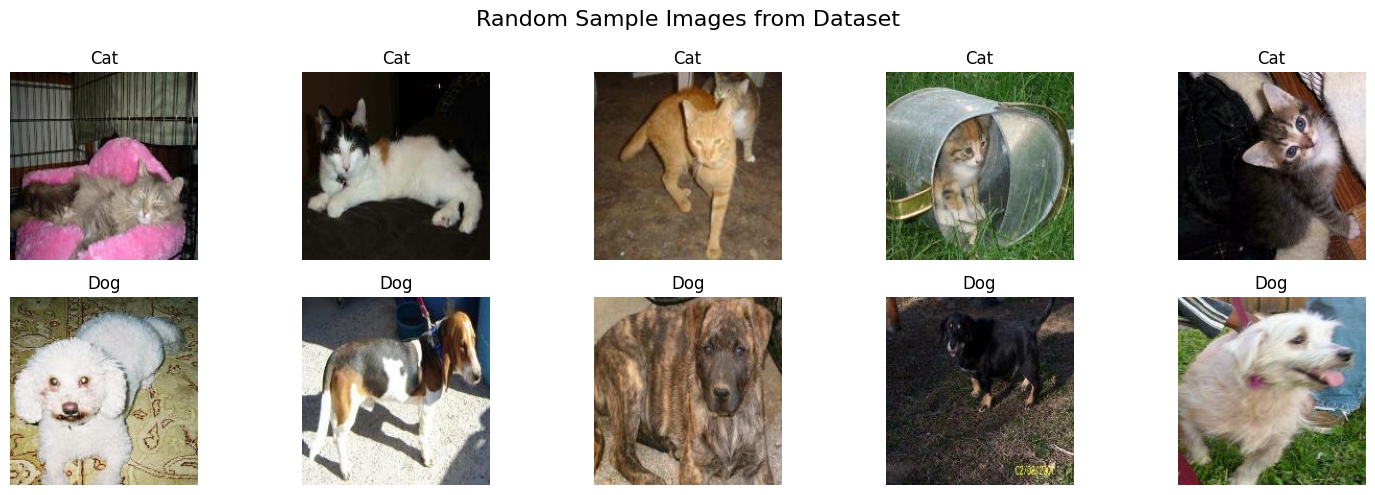

In [6]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

dataset_path = "cats_vs_dogs/train" 

n = 5

# Define class folders
classes = ["cats", "dogs"]

# Set up the plot
fig, axes = plt.subplots(len(classes), n, figsize=(n*3, 2.5*len(classes)))
fig.suptitle("Random Sample Images from Dataset", fontsize=16)

for row, class_name in enumerate(classes):
    class_dir = os.path.join(dataset_path, class_name)
    image_files = [f for f in os.listdir(class_dir) if f.lower().endswith(('jpg', 'jpeg', 'png'))]
    selected = random.sample(image_files, min(n, len(image_files)))

    for col in range(n):
        ax = axes[row, col] if len(classes) > 1 else axes[col]
        img_path = os.path.join(class_dir, selected[col])
        img = Image.open(img_path)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f"{class_name[:-1].capitalize()}")

plt.tight_layout() # type: ignore
plt.show()


In [7]:
import os
import tensorflow as tf

# Get class names from dataset
class_names = train_ds.class_names

# Save images from the dataset
i = 0
for images, labels in train_ds.unbatch():  # Unbatch to get (image, label) pairs
    image = tf.cast(images, tf.uint8)  # Ensure correct dtype
    label = int(labels.numpy())        # Convert Tensor -> int

    # Set output folder and filename
    save_dir = f'./cats_vs_dogs/train/{class_names[label]}'
    os.makedirs(save_dir, exist_ok=True)
    filename = f"{save_dir}/{class_names[label]}_{i}.jpg"

    # Save image
    tf.keras.preprocessing.image.save_img(filename, image.numpy()) # type: ignore
    i += 1

print(f"✅ Saved {i} images to ./cats_vs_dogs/train/")


✅ Saved 2000 images to ./cats_vs_dogs/train/


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization # type: ignore
from tensorflow.keras.models import Sequential # type: ignore

In [9]:
datagen = ImageDataGenerator(
    rescale=1/255,
    validation_split=0.2,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.10,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    'cats_vs_dogs/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    'cats_vs_dogs/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 3200 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [10]:
# build CNN Model


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='sigmoid') 
])


c:\Users\SATWIK\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    10,616,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,637,377 (40.58 MB)

 Trainable params: 10,636,929 (40.58 MB)

 Non-trainable params: 448 (1.75 KB)

In [27]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_generator, epochs=5, validation_data=validation_generator)    

Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 150s 1s/step - accuracy: 0.8677 - loss: 0.3215 - val_accuracy: 0.7113 - val_loss: 0.7874
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 210s 2s/step - accuracy: 0.8521 - loss: 0.3266 - val_accuracy: 0.8325 - val_loss: 0.3979
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 252s 3s/step - accuracy: 0.8926 - loss: 0.2692 - val_accuracy: 0.7713 - val_loss: 0.5739
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 121s 1s/step - accuracy: 0.8931 - loss: 0.2637 - val_accuracy: 0.7450 - val_loss: 0.5582
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - accuracy: 0.9092 - loss: 0.2351 - val_accuracy: 0.8425 - val_loss: 0.3599


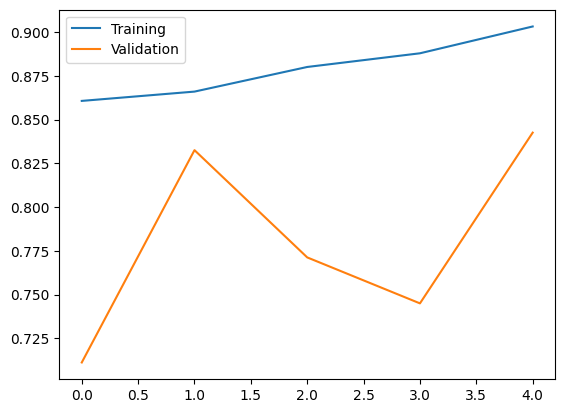

In [28]:
history.history

plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation') 
plt.legend(['Training', 'Validation'])


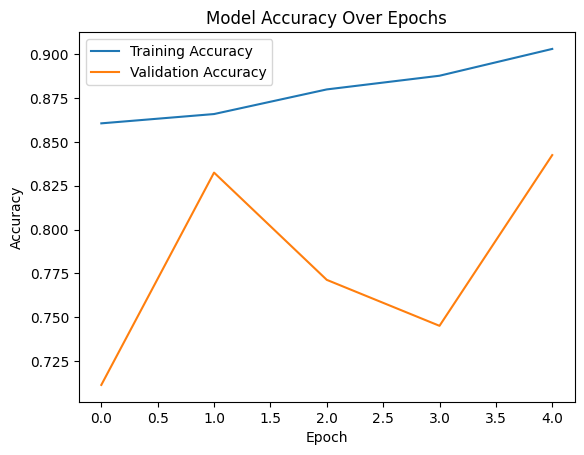

In [29]:
# Sample code to show accuracy graph (already in your notebook)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


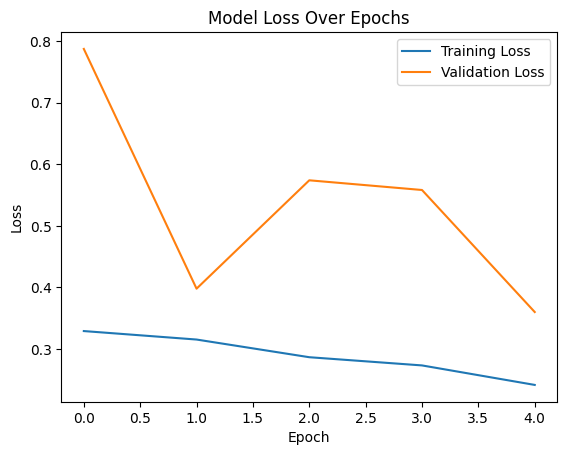

In [30]:
# Sample code to show loss graph
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [31]:
# save model
model.save('cats_vs_dogs.keras')

In [32]:
model_load = tf.keras.models.load_model('cats_vs_dogs.keras') # type: ignore

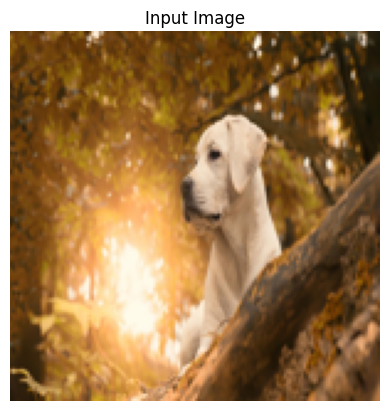

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Predicted label: It is a DOGS (Confidence: 0.99)
Model accuracy on validation set: 89.59%


In [43]:
import requests
from PIL import Image
from tensorflow.keras.preprocessing import image  # type: ignore

img_url = "https://wallpaperaccess.com/full/5595887.jpg"
img = Image.open(requests.get(img_url, stream=True).raw).resize((150, 150))  # type: ignore # Resize to model input size

plt.imshow(img)
plt.axis('off')
plt.title("Input Image")
plt.show()

image_array = image.img_to_array(img)
img_batch = np.expand_dims(image_array, axis=0)  # Add batch dimension
img_batch = img_batch / 255.0  # Normalize pixel values

prediction = model.predict(img_batch)

class_indices = train_generator.class_indices  # Example: {'cat': 0, 'dog': 1}
classes = {v: k for k, v in class_indices.items()}

raw_score = prediction[0][0]
if raw_score > 0.5:
    predicted_class = 1
    confidence = raw_score
else:
    predicted_class = 0
    confidence = 1 - raw_score

predicted_label = classes[predicted_class]

print(f"Predicted label: It is a {predicted_label.upper()} (Confidence: {confidence:.2f})")

loss, acc = model.evaluate(train_generator, verbose=0)
print(f"Model accuracy on validation set: {acc * 100:.2f}%")


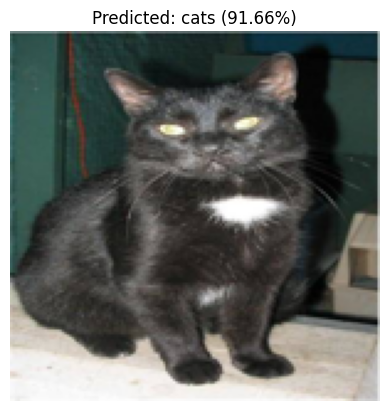

Predicted: It is a cats
Confidence: 0.9166
📊 Model accuracy on validation set: 82.88%


In [42]:
import os, random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing import image # type: ignore

# Set dataset path and class names
dataset_path = os.path.expanduser("~/.keras/datasets/cats_and_dogs_filtered/train")
classes = ["cats", "dogs"]

# Pick a random image from a random class
chosen_class = random.choice(classes)
img_file = random.choice(os.listdir(os.path.join(dataset_path, chosen_class)))
img_path = os.path.join(dataset_path, chosen_class, img_file)

# Preprocess image
img_size = model.input_shape[1:3]
img = Image.open(img_path).convert("RGB").resize(img_size)
img_array = image.img_to_array(img) / 255.0
img_batch = np.expand_dims(img_array, axis=0)

# Predict
pred = model.predict(img_batch, verbose=0)
if pred.shape[-1] == 1:
    index = int(pred[0][0] > 0.5)
    conf = pred[0][0] if index == 1 else 1 - pred[0][0]
else:
    index = np.argmax(pred[0])
    conf = pred[0][index]

# Get class names
class_names = getattr(train_ds, 'class_names', classes)

# Show result
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {class_names[index]} ({conf*100:.2f}%)")
plt.show()

print(f"Predicted: It is a {class_names[index]}")
print(f"Confidence: {conf:.4f}")

loss, acc = model.evaluate(validation_generator, verbose=0)
print(f"📊 Model accuracy on validation set: {acc * 100:.2f}%")